In [ ]:
## Remove Warnings ##
import warnings
warnings.filterwarnings('ignore')

## Data ##
import pandas as pd
import numpy as np
import math

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm

## Preprocessing ##
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

## Cluster Modelling ##
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CLASS UUM/MACHINE LEARNING ASSIGNMENT/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
def create_temp_df(temp_df):
    temp_df = temp_df.copy()
    temp_df['Sex'] = temp_df['Sex'].replace(0, 'Male')
    temp_df['Sex'] = temp_df['Sex'].replace(1, 'Female')
    temp_df['Marital status'] = temp_df['Marital status'].replace(0, 'Single')
    temp_df['Marital status'] = temp_df['Marital status'].replace(1, 'Non-Single')
    temp_df['Education'] = temp_df['Education'].replace(0, 'Other/Unknown')
    temp_df['Education'] = temp_df['Education'].replace(1, 'High School')
    temp_df['Education'] = temp_df['Education'].replace(2, 'University')
    temp_df['Education'] = temp_df['Education'].replace(3, 'Graduate School')
    temp_df['Occupation'] = temp_df['Occupation'].replace(0, 'Unskilled Employee')
    temp_df['Occupation'] = temp_df['Occupation'].replace(1, 'Skilled Employee')
    temp_df['Occupation'] = temp_df['Occupation'].replace(2, 'Highly Qualified Employee')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(0, 'Small City')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(1, 'Mid-Sized City')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(2, 'Big City')
    return temp_df

In [ ]:
temp_df = create_temp_df(df)

In [ ]:
row_n = 3
col_n = 2

sex_counts = temp_df['Sex'].value_counts().sort_values(ascending=True)
marital_counts = temp_df['Marital status'].value_counts().sort_values(ascending=True)
education_counts = temp_df['Education'].value_counts().sort_values(ascending=True)
occupation_counts = temp_df['Occupation'].value_counts().sort_values(ascending=True)
settlement_counts = temp_df['Settlement size'].value_counts().sort_values(ascending=True)
categorical_lst = [sex_counts, marital_counts, education_counts, occupation_counts, settlement_counts]
categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

fig = make_subplots(rows=row_n, cols=col_n)

for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values,
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Emrld,
            textfont=dict(size=10)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )

fig.update_layout(
    height=800,
    title_text="Categorical Variable Distribution",
    template='simple_white')
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Histogram(x=df['Age'], name='Age Histogram', marker_color='darkgreen'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df['Age'], name='Age Box Plot', marker_color='darkgreen'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['Income'], name='Income Histogram', marker_color='seagreen'),
    row=2, col=1
)

fig.add_trace(
    go.Box(y=df['Income'], name='Income Box Plot', marker_color='seagreen'),
    row=2, col=2
)

fig.update_layout(
    title_text='Continuous Variable Distribution',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()


In [ ]:
marital_colors=['darkgreen', '#ACDF87']

gender_by_marital = pd.DataFrame(df.groupby('Sex')['Marital status'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Single', 'Non-Single'],
                     values=[int(gender_by_marital.loc[0,0]), int(gender_by_marital.loc[0,1])],
                     textinfo='percent+value+label',
                     marker_colors=marital_colors,
                     name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=['Single', 'Non-Single'],
                     values=[int(gender_by_marital.loc[1,0]), int(gender_by_marital.loc[1,1])],
                     textinfo='percent+value+label',
                     marker_colors=marital_colors,
                     name="Female"),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name",
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.update_layout(
    title_text="Gender and Marital Status Distribution",
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']

gender_by_education = pd.DataFrame(df.groupby('Sex')['Education'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
                     values=[int(gender_by_education.loc[0,0]), int(gender_by_education.loc[0,1]),
                            int(gender_by_education.loc[0,2]), int(gender_by_education.loc[0,3])],
                     textinfo='percent+value+label',
                     marker_colors=education_colors,
                     name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
                     values=[int(gender_by_education.loc[1,0]), int(gender_by_education.loc[1,1]),
                            int(gender_by_education.loc[1,2]), int(gender_by_education.loc[1,3])],
                     textinfo='percent+value+label',
                     marker_colors=education_colors,
                     name="Female"),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name",
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.update_layout(
    title_text="Gender and Education Distribution",
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
fig = px.histogram(temp_df, x='Sex', y='Age',
                 color='Marital status', barmode='group',
                 histfunc='avg', text_auto=True,
                 template='simple_white',
                 title='Gender, Age, and Marital Status Distribution',
                 color_discrete_sequence=['darkgreen', '#ACDF87'])

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()


In [ ]:
income_by_sex = temp_df.groupby('Sex')['Income'].mean().sort_values(ascending=True)
income_by_marital = temp_df.groupby('Marital status')['Income'].mean().sort_values(ascending=True)
income_by_age = temp_df.groupby('Age')['Income'].mean()
income_by_education = temp_df.groupby('Education')['Income'].mean().sort_values(ascending=True)
income_by_occupation = temp_df.groupby('Occupation')['Income'].mean().sort_values(ascending=True)
income_by_settlement = temp_df.groupby('Settlement size')['Income'].mean().sort_values(ascending=True)
income_lst = [income_by_sex, income_by_marital, income_by_age, income_by_education, income_by_occupation, income_by_settlement]
income_labels = ['Sex', 'Marital Status', 'Age', 'Education', 'Occupation', 'Settlement Size']

row_n = 3
col_n = 2

fig = make_subplots(rows=row_n, cols=col_n)

for i, col in enumerate(income_labels):
    fig.add_trace(
        go.Bar(
            x=income_lst[i].index.astype('str'),
            y=income_lst[i].values,
            name=col,
            text=np.round(income_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Emrld,
            textfont=dict(size=10)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )

fig.update_layout(
    height=800,
    title_text="Bar Chart on Income Analysis",
    template='simple_white')
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

In [ ]:
rs_value = 0

In [ ]:
def normality_test(feature):
    return stats.normaltest(feature)[1]

In [ ]:
def power_log_normality_test(feature):

    # Power Transformation Test
    power_feature = PowerTransformer().fit_transform(feature.to_numpy().reshape(-1,1))
    power_normaltest = normality_test(power_feature.flatten())

    # Log Transformation Test
    log_feature = np.log(feature)
    log_normaltest = normality_test(log_feature)

    return power_normaltest, log_normaltest

In [ ]:
def visualize_silhouette(model, cluster_lists, X_features):

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        if (model=='GMM'):
            cluster =  GaussianMixture(n_components=n_cluster, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)
        elif (model=='KMeans'):
            cluster = KMeans(n_clusters=n_cluster, n_init=10, max_iter=500, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster: '+str(n_cluster) + ' Silhouette Score: '+ str(round(sil_avg,3)),
                           fontsize=10)
        axs[ind].set_xlabel('The silhouette coefficient value')

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color=  cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
def evaluate(model_labels):
    sil_avg = silhouette_score(X_features, model_labels)
    return sil_avg

In [ ]:
age_normaltest = normality_test(df['Age'])
power_age_normaltest, log_age_normaltest = power_log_normality_test(df['Age'])

print(f'Age Normal Distribution P-Value: {age_normaltest}')
print(f'Power Age Normal Distribution P-Value: {power_age_normaltest}')
print(f'Log Age Normal Distribution P-Value: {log_age_normaltest}')

Age Normal Distribution P-Value: 3.3428344869999675e-56
Power Age Normal Distribution P-Value: 9.92408801400393e-36
Log Age Normal Distribution P-Value: 7.519702564848323e-25


In [ ]:
income_normaltest = normality_test(df['Income'])
power_income_normaltest, log_income_normaltest = power_log_normality_test(df['Income'])

print(f'Income Normal Distribution P-Value: {income_normaltest}')
print(f'Power Income Normal Distribution P-Value: {power_income_normaltest}')
print(f'Log Income Normal Distribution P-Value: {log_income_normaltest}')

Income Normal Distribution P-Value: 2.5009638879187734e-98
Power Income Normal Distribution P-Value: 8.921729867143389e-07
Log Income Normal Distribution P-Value: 9.41366371618838e-08


In [ ]:
def preprocess(df):

    X_features = df.copy()

    # Power Transform Income, Log Transform Age
    power_income = PowerTransformer().fit_transform(df['Income'].to_numpy().reshape(-1,1))
    power_income = pd.Series(data=power_income.flatten(), index=list(range(len(power_income.flatten()))))
    log_age = np.log(df['Age'])
    df['Power_Income'] = power_income
    df['Log_Age'] = log_age
    X_features = df.drop(columns=['Income', 'Age'], inplace=False)

    # MinMax Scaling
    scaler = MinMaxScaler()
    X_features = scaler.fit_transform(X_features)

    return X_features

In [ ]:
X_features = preprocess(df)

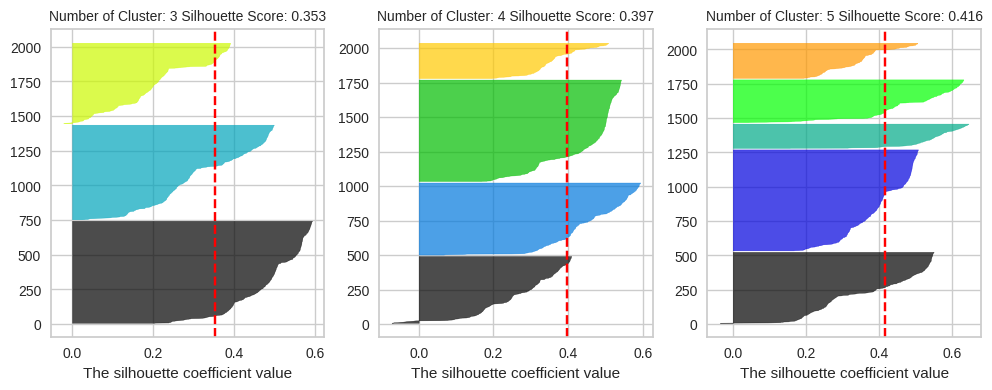

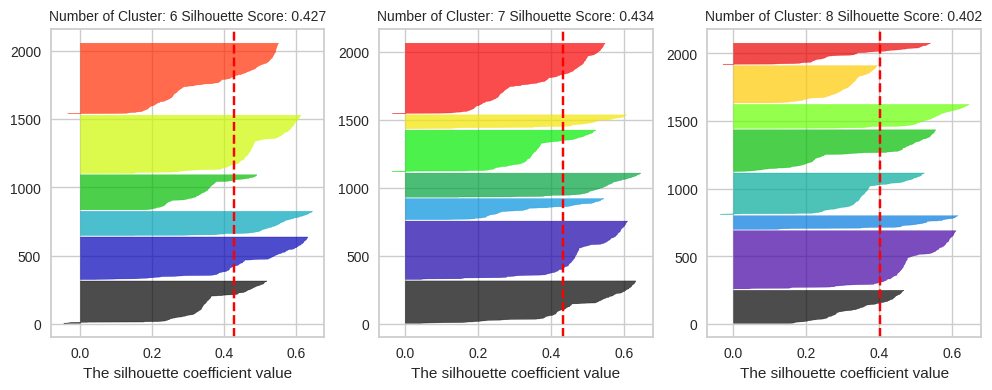

In [ ]:
visualize_silhouette('KMeans', [3,4,5], X_features)
visualize_silhouette('KMeans', [6,7,8], X_features)

In [ ]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=500, random_state=0)
kmeans_labels = kmeans.fit_predict(X_features)
df['kmeans_labels'] = kmeans_labels

In [ ]:
# Find Best Parameters for MeanShift
best_bandwidth = estimate_bandwidth(X_features, quantile=0.1)
print('Best Bandwidth: ', round(best_bandwidth, 3))

Best Bandwidth:  0.66


In [ ]:
meanshift = MeanShift(bandwidth=best_bandwidth)
meanshift_labels = meanshift.fit_predict(X_features)
print('MeanShift Labels Type: ', np.unique(meanshift_labels))

df['meanshift_labels'] = meanshift_labels

MeanShift Labels Type:  [0 1 2 3 4]


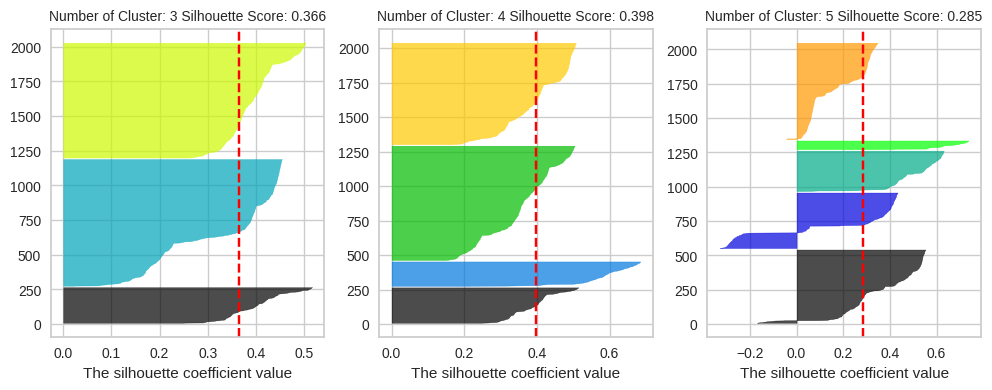

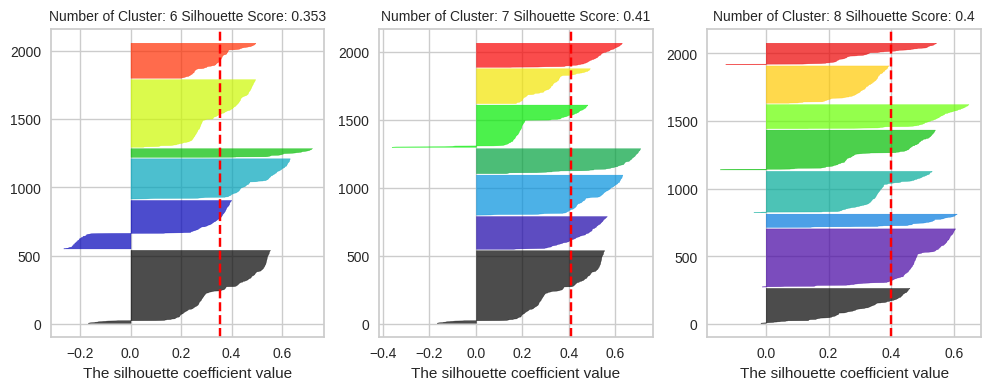

In [ ]:
visualize_silhouette('GMM', [3,4,5], X_features)
visualize_silhouette('GMM', [6,7,8], X_features)

In [ ]:
gmm = GaussianMixture(n_components=6, random_state=0).fit(X_features)
gmm_labels = gmm.fit_predict(X_features)
df['gmm_labels'] = gmm_labels

In [ ]:
models = [df['kmeans_labels'], df['meanshift_labels'], df['gmm_labels']]
scores = [evaluate(model) for model in models]
model_labels = ['KMeans', 'MeanShift', 'GMM']

In [ ]:
models_df = pd.Series(scores, index=model_labels, name='scores').sort_values(ascending=True)

fig = px.bar(x=models_df.index, y=models_df.values,
             text=np.round(models_df.values,5),
             color=models_df.values,
             color_continuous_scale='YlGn')

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.update_layout(
    title_text='Modelling',
    xaxis=dict(
        title='Model',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Silhouette Score',
        titlefont_size=16
    ),
    template='simple_white',
)
fig.show()

In [ ]:
pca = PCA(n_components=2, random_state=rs_value)
pca_transformed = pca.fit_transform(X_features)

df['ftr1'] = pca_transformed[:, 0]
df['ftr2'] = pca_transformed[:, 1]

In [ ]:
def visualize_clusters(model, model_labels):
    fig = px.scatter(df, x='ftr1', y='ftr2', color=model_labels)
    fig.update_layout(
        title_text=f'Scatter Plot on {model} Clustering',
        template='simple_white'
    )
    fig.update_traces(opacity=0.6)
    fig.show()

In [ ]:
model_names = ['Kmeans', 'MeanShift', 'GMM']
cluster_models = ['kmeans_labels', 'meanshift_labels', 'gmm_labels']
for i in range(len(cluster_models)):
    visualize_clusters(model_names[i], cluster_models[i])

In [ ]:
def visualize_categorical_vars(df):

    sex_counts = df['Sex'].value_counts().sort_values(ascending=True)
    marital_counts = df['Marital status'].value_counts().sort_values(ascending=True)
    education_counts = df['Education'].value_counts().sort_values(ascending=True)
    occupation_counts = df['Occupation'].value_counts().sort_values(ascending=True)
    settlement_counts = df['Settlement size'].value_counts().sort_values(ascending=True)
    categorical_lst = [sex_counts, marital_counts, education_counts, occupation_counts, settlement_counts]
    categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

    row_n=3
    col_n=2

    fig = make_subplots(rows=row_n, cols=col_n)

    for i, col in enumerate(categorical_labels):
        fig.add_trace(
            go.Bar(
                x=categorical_lst[i].index.astype('str'),
                y=categorical_lst[i].values,
                name=col,
                text=np.round(categorical_lst[i].values,3),
                textposition='inside',
                marker_color=px.colors.sequential.Emrld,
                textfont=dict(size=10)),
            row=int(i/col_n)+1, col=int(i%col_n)+1
            )

    fig.update_layout(
        height=800,
        title_text="Categorical Variable Distribution",
        template='simple_white')
    fig.update_traces(marker_line_color='black',
                      marker_line_width=1.5,
                      opacity=0.8)
    fig.show()

In [ ]:
def visualize_continuous_vars(df):
    fig = make_subplots(rows=2, cols=2)

    fig.add_trace(
        go.Histogram(x=df['Age'], name='Age Histogram', marker_color='darkgreen'),
        row=1, col=1
    )

    fig.add_trace(
        go.Box(y=df['Age'], name='Age Box Plot', marker_color='darkgreen'),
        row=1, col=2
    )

    fig.add_trace(
        go.Histogram(x=df['Income'], name='Income Histogram', marker_color='seagreen'),
        row=2, col=1
    )

    fig.add_trace(
        go.Box(y=df['Income'], name='Income Box Plot', marker_color='seagreen'),
        row=2, col=2
    )

    fig.update_layout(
        title_text='Continuous Variable Distribution',
        template='simple_white')
    fig.update_traces(
        marker_line_color='black',
        marker_line_width=1.5,
        opacity=0.8)
    fig.show()

In [ ]:
df = df.iloc[:,:7]
df['kmeans_labels'] = kmeans_labels
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_labels
0,0,0,67,2,124670,1,2,6
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,6
4,0,0,53,1,149031,1,1,6


In [ ]:
cluster_zero = df.loc[df['kmeans_labels']==0]
cluster_zero = create_temp_df(cluster_zero)
visualize_categorical_vars(cluster_zero)
visualize_continuous_vars(cluster_zero)

In [ ]:
cluster_one = df.loc[df['kmeans_labels']==1]
cluster_one = create_temp_df(cluster_one)
visualize_categorical_vars(cluster_one)
visualize_continuous_vars(cluster_one)

In [ ]:
cluster_two = df.loc[df['kmeans_labels']==2]
cluster_two = create_temp_df(cluster_two)
visualize_categorical_vars(cluster_two)
visualize_continuous_vars(cluster_two)

In [ ]:
cluster_three = df.loc[df['kmeans_labels']==3]
cluster_three = create_temp_df(cluster_three)
visualize_categorical_vars(cluster_three)
visualize_continuous_vars(cluster_three)

In [ ]:
cluster_four = df.loc[df['kmeans_labels']==4]
cluster_four = create_temp_df(cluster_four)
visualize_categorical_vars(cluster_four)
visualize_continuous_vars(cluster_four)

In [ ]:
cluster_five = df.loc[df['kmeans_labels']==5]
cluster_five = create_temp_df(cluster_five)
visualize_categorical_vars(cluster_five)
visualize_continuous_vars(cluster_five)

In [ ]:
cluster_six = df.loc[df['kmeans_labels']==6]
cluster_six = create_temp_df(cluster_six)
visualize_categorical_vars(cluster_six)
visualize_continuous_vars(cluster_six)